In [1]:
###renyi antropy---image processing and acquisition
%matplotlib inline

/Users/rolland/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


((1080, 1920, 3), (1080, 1920, 3), (1080, 1920, 3))


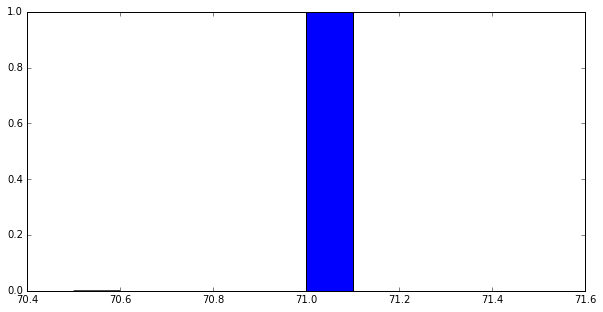

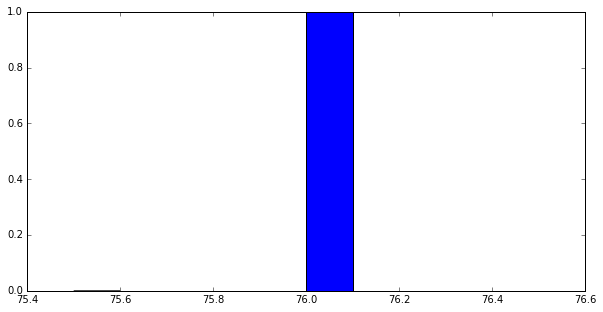

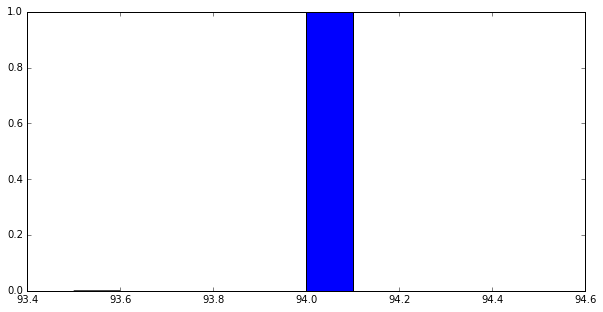

[71] [76] [94]


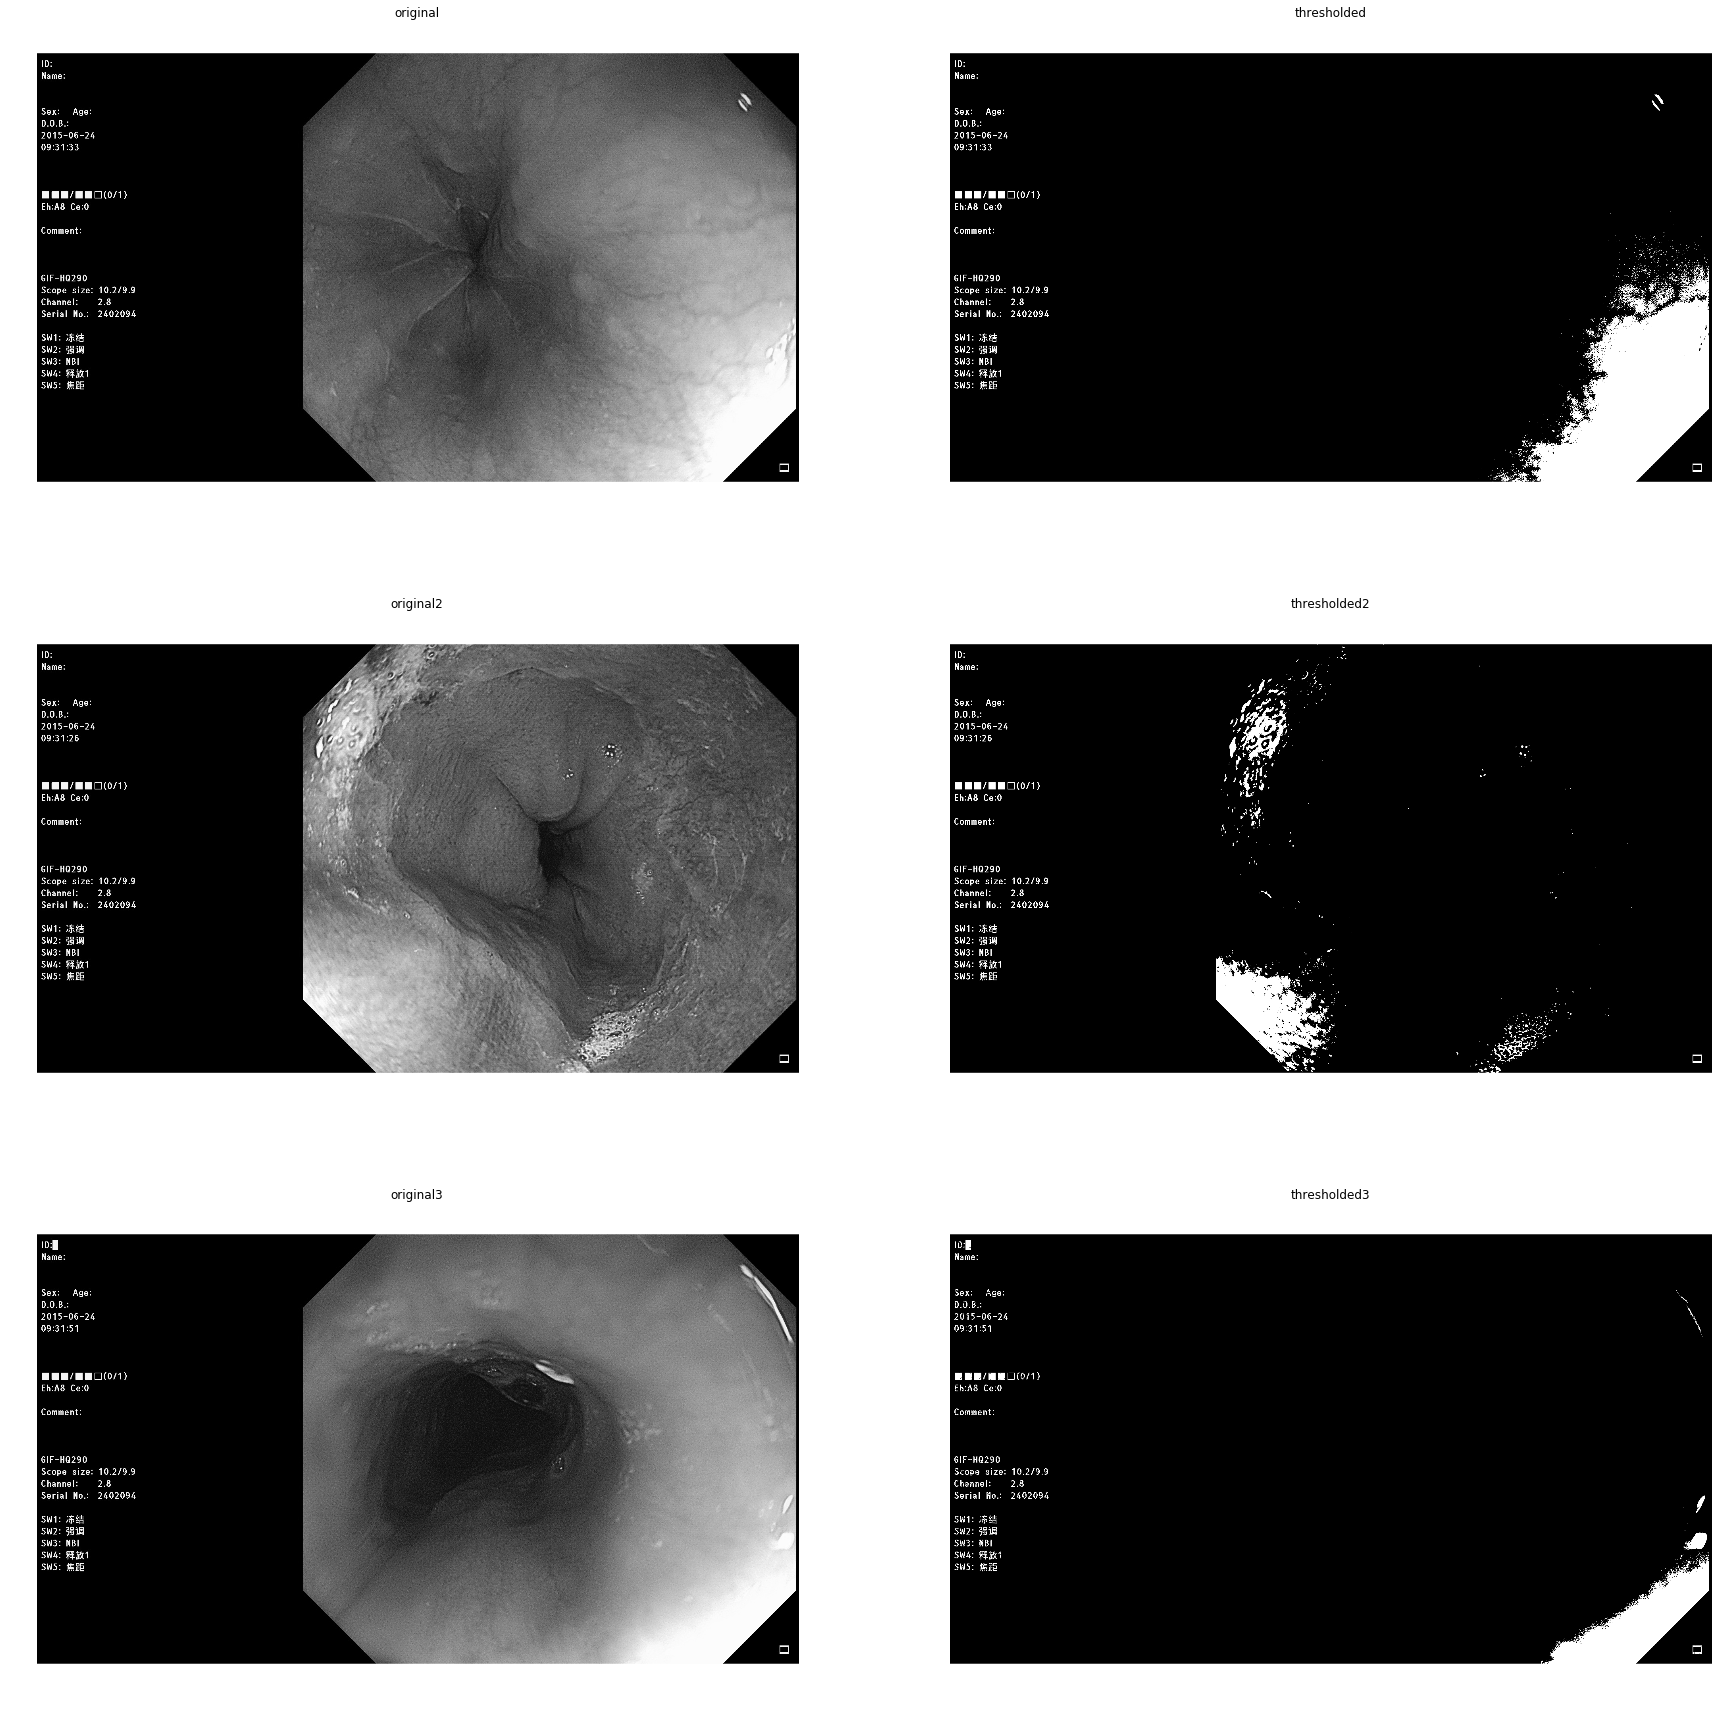

In [3]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
import skimage.exposure as imexp
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

#defining function

def renyi_seg_fn(im,alpha):
    hist = imexp.histogram(im)
    
    #convert all values to float
    hist_float = [float(i) for i in hist[0]]
    
    #compute the pdf
    pdf = hist_float/np.sum(hist_float)
    
    #compute the cdf
    cumsum_pdf = np.cumsum(pdf)
    
    s = 0
    e = 255 # asuming 8 bit image
    scalar  = 1.0/(1-alpha)
    
    #A very small balue to prevent divition by zero
    eps = np.spacing(1)
    rr= e-s
    
    #the second parentheses is needed because the parameters are tuple
    h1 = np.zeros((rr,1))
    h2 = np.zeros((rr,1))
    
    #the following llop coputes h1 and h2 values used to compute the entropy
    for ii in range(1,rr):
        iidash = ii+s
        temp1 = np.power(pdf[1:iidash]/cumsum_pdf[iidash],scalar)
        h1[ii] = np.log(np.sum(temp1)+eps)
        temp2 = np.power(pdf[iidash+1:255]/(1-cumsum_pdf[iidash]),scalar)
        h2[ii] = np.log(np.sum(temp2)+eps)
        
    T = h1 + h2
    
    #Entropy value is calculated 
    T = -T*scalar
    

    
    #location where the maximum entropy occurs is the threshold for the renyi entropy
    location = T.argmax(axis=0)
    
    #show histogram
    
    fig, axes= plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
    
    axes.hist(location)
    plt.show()
   
    
    #location value is used as the threshold
    thresh = location
    return thresh
    
  
#loading images
im = Image.open('samples/29  ≥π‹ Í⁄√≈.bmp')
im2 = Image.open('samples/30  ≥π‹ ≥›◊¥œﬂ.bmp')
im3 = Image.open('samples/34  ≥π‹÷–…œ.bmp')

npimg = np.array(im);
npimg2 = np.array(im2);
npimg3 = np.array(im3);
print(npimg.shape,npimg2.shape,npimg3.shape);


grayimg = rgb2gray(npimg)
grayimg2 = rgb2gray(npimg2)
grayimg3 = rgb2gray(npimg3)
 
###the higher the value of alpha the fewer the number of abnormal tissues detected
#alpha = 3
alpha = 2.5    
threshold = renyi_seg_fn(grayimg,alpha)
threshold2 = renyi_seg_fn(grayimg2,alpha)
threshold3 = renyi_seg_fn(grayimg3,alpha)

###this coeficient is needed the detect the abonomal soft tissues
coef = 0.01
threshImg = grayimg > threshold*coef
threshImg2 = grayimg2 > threshold2*coef
threshImg3 = grayimg3 > threshold3*coef

print threshold,threshold2,threshold3

fig, axes= plt.subplots(3, 2, figsize=(30, 30), sharex=True, sharey=True)

axes[0,0].imshow(grayimg,cmap='gray')
axes[0,0].set_title('original')
axes[0,0].axis('off')

axes[0,1].imshow(threshImg,cmap='gray')
axes[0,1].set_title('thresholded')
axes[0,1].axis('off')

axes[1,0].imshow(grayimg2,cmap='gray')
axes[1,0].set_title('original2')
axes[1,0].axis('off')

axes[1,1].imshow(threshImg2,cmap='gray')
axes[1,1].set_title('thresholded2')
axes[1,1].axis('off')


axes[2,0].imshow(grayimg3,cmap='gray')
axes[2,0].set_title('original3')
axes[2,0].axis('off')

axes[2,1].imshow(threshImg3,cmap='gray')
axes[2,1].set_title('thresholded3')
axes[2,1].axis('off')

plt.show()
